# Agglomerative Hierarchial Clustering (Mall Customers' Spending Score Clustering


## Importing Neccessary Libraries and dataset

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [37]:
df=pd.read_csv('Mall_Customers.csv')
print(df.head())
X=df.iloc[:,1:]

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Exploratory Data Analysis

### Checking for missing values

In [38]:
print(df.isnull().sum())
print(X)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


### Implementing OneHotEncoder for Genre(gender) column

In [39]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X)

In [58]:
print(X)

[[  0.   1.  19.  15.  39.]
 [  0.   1.  21.  15.  81.]
 [  1.   0.  20.  16.   6.]
 [  1.   0.  23.  16.  77.]
 [  1.   0.  31.  17.  40.]
 [  1.   0.  22.  17.  76.]
 [  1.   0.  35.  18.   6.]
 [  1.   0.  23.  18.  94.]
 [  0.   1.  64.  19.   3.]
 [  1.   0.  30.  19.  72.]
 [  0.   1.  67.  19.  14.]
 [  1.   0.  35.  19.  99.]
 [  1.   0.  58.  20.  15.]
 [  1.   0.  24.  20.  77.]
 [  0.   1.  37.  20.  13.]
 [  0.   1.  22.  20.  79.]
 [  1.   0.  35.  21.  35.]
 [  0.   1.  20.  21.  66.]
 [  0.   1.  52.  23.  29.]
 [  1.   0.  35.  23.  98.]
 [  0.   1.  35.  24.  35.]
 [  0.   1.  25.  24.  73.]
 [  1.   0.  46.  25.   5.]
 [  0.   1.  31.  25.  73.]
 [  1.   0.  54.  28.  14.]
 [  0.   1.  29.  28.  82.]
 [  1.   0.  45.  28.  32.]
 [  0.   1.  35.  28.  61.]
 [  1.   0.  40.  29.  31.]
 [  1.   0.  23.  29.  87.]
 [  0.   1.  60.  30.   4.]
 [  1.   0.  21.  30.  73.]
 [  0.   1.  53.  33.   4.]
 [  0.   1.  18.  33.  92.]
 [  1.   0.  49.  33.  14.]
 [  1.   0.  21.  33

In [41]:

column_names=['Genre_male','Genre_female','Age','Annual Income (k$)','Spending Score (1-100)']
X=pd.DataFrame(X,columns=column_names)

<Figure size 3000x1000 with 0 Axes>

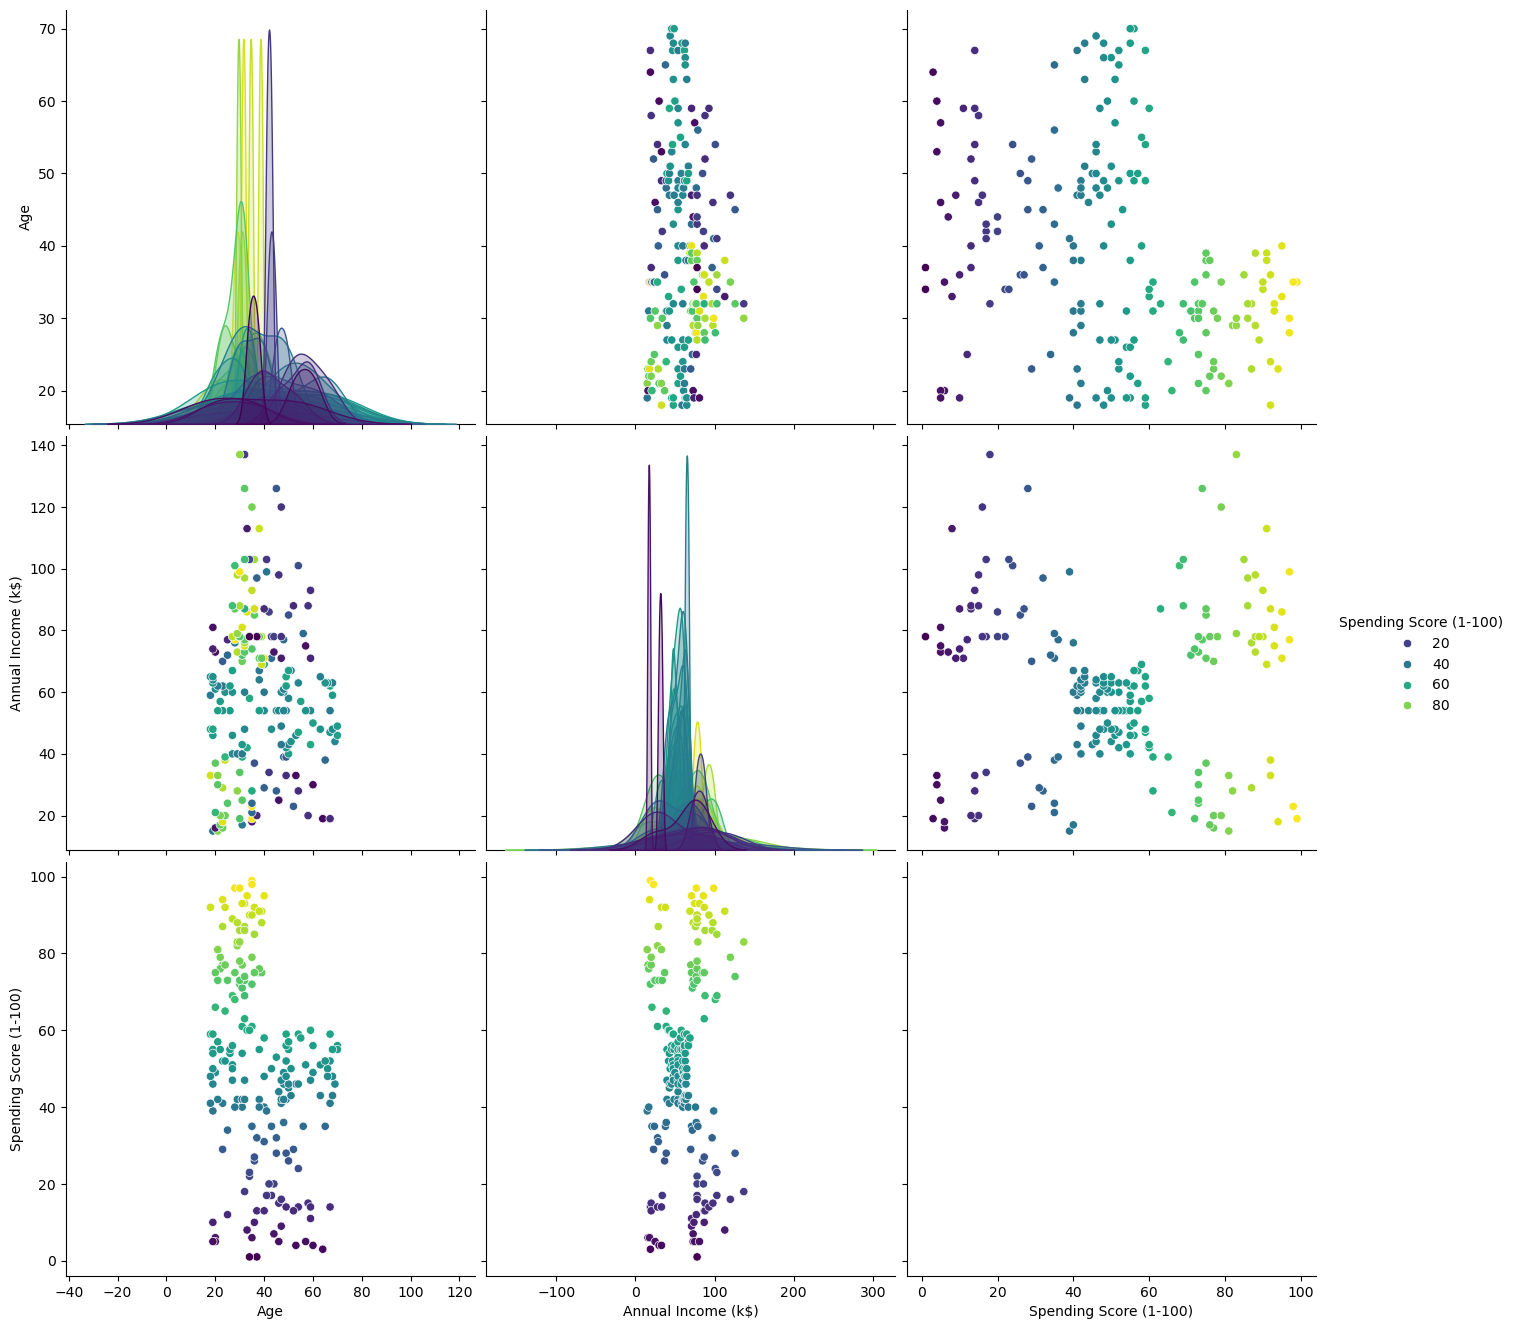

In [43]:
plt.figure(figsize=(30,10))
sns.pairplot(df,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Spending Score (1-100)',palette='viridis',height=4.5)

In [44]:

X.corr()

,Genre_male,Genre_female,Age,Annual Income (k$),Spending Score (1-100)
Genre_male,1.000000,-1.000000,-0.060867,-0.056410,0.058109
Genre_female,-1.000000,1.000000,0.060867,0.056410,-0.058109
Age,-0.060867,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.058109,-0.327227,0.009903,1.000000


### -1 correlation between the columns Genre_male and Genre_female shows perfect multicollinearity which is not good for our agglomerative clustring


<Axes: >

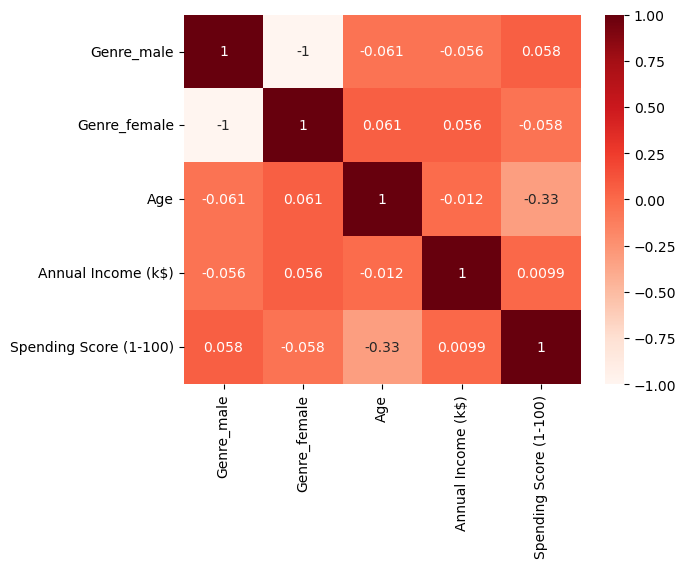

In [45]:
sns.heatmap(X.corr(),annot=True,cmap='Reds',cbar=True)

 ## We will make 2 disctinct models
 ## 1. Two dimensions (Annual Income and Spending Score) so it is easily visualized .
 ## 2. Four dimensions(We exclude genre_male, we use genre_female,age, annual income and spending score)

# 2D model 

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

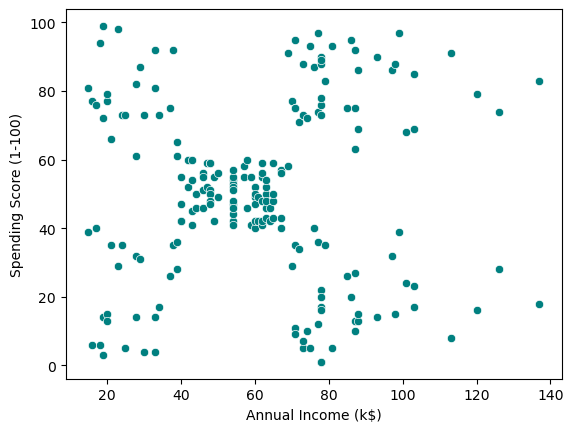

In [47]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',color='teal')

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

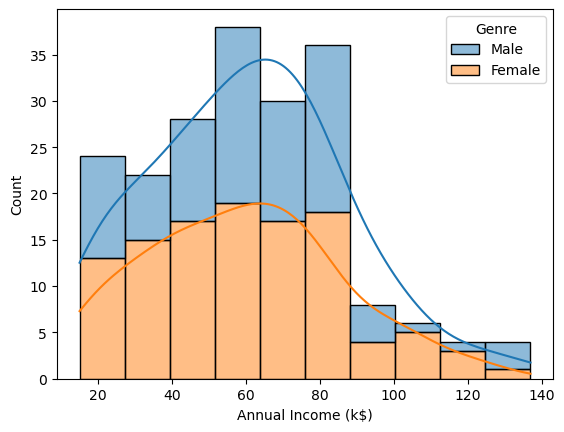

In [7]:
sns.histplot(data=df,x='Annual Income (k$)',kde=True, hue="Genre", multiple="stack")

## Feature Scaling the Columns

In [64]:
sc=StandardScaler()
X[:,2:5]=sc.fit_transform(X[:,2:5])
print(X)

[[ 0.          1.         -1.42456879 -1.73899919 -0.43480148]
 [ 0.          1.         -1.28103541 -1.73899919  1.19570407]
 [ 1.          0.         -1.3528021  -1.70082976 -1.71591298]
 [ 1.          0.         -1.13750203 -1.70082976  1.04041783]
 [ 1.          0.         -0.56336851 -1.66266033 -0.39597992]
 [ 1.          0.         -1.20926872 -1.66266033  1.00159627]
 [ 1.          0.         -0.27630176 -1.62449091 -1.71591298]
 [ 1.          0.         -1.13750203 -1.62449091  1.70038436]
 [ 0.          1.          1.80493225 -1.58632148 -1.83237767]
 [ 1.          0.         -0.6351352  -1.58632148  0.84631002]
 [ 0.          1.          2.02023231 -1.58632148 -1.4053405 ]
 [ 1.          0.         -0.27630176 -1.58632148  1.89449216]
 [ 1.          0.          1.37433211 -1.54815205 -1.36651894]
 [ 1.          0.         -1.06573534 -1.54815205  1.04041783]
 [ 0.          1.         -0.13276838 -1.54815205 -1.44416206]
 [ 0.          1.         -1.20926872 -1.54815205  1.11

## Plotting a Dendrogram to visualize clusters using sch.linkage(Euclidean Distance)

### We can calculate the average number of clusters by finding out the longest 'gap' ie the biggest cost or largest distance jump. I have drawn a horizontal line at the identified gap from here we see that we get 5 clusters

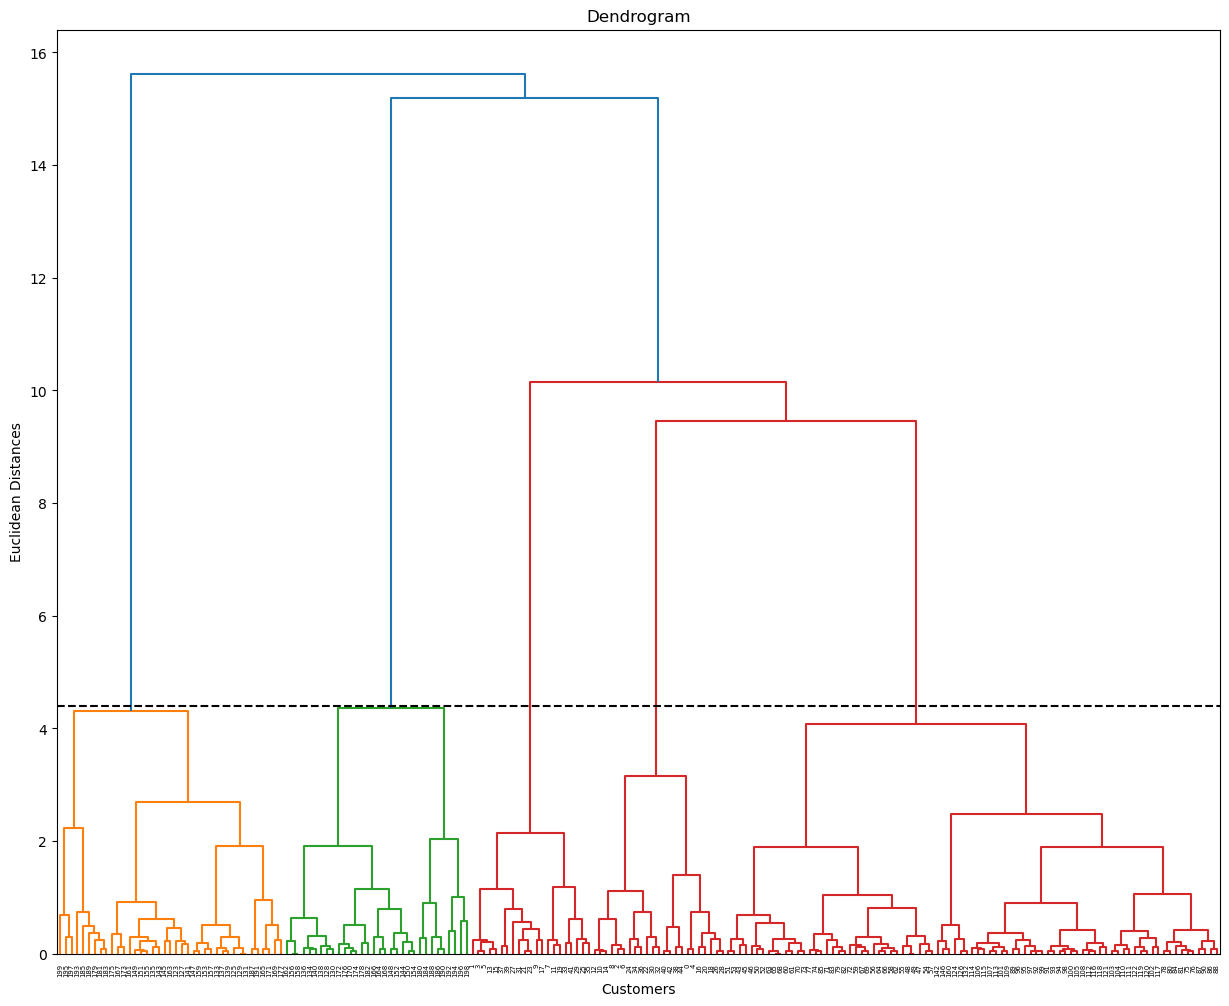

In [75]:
X=np.array(X)
plt.figure(figsize=(15,12))
X_2d=X[:,3:5]
dendrogram=sch.dendrogram(sch.linkage(X_2d,method='ward'))
plt.axhline(y=4.4,color='black',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

## Applying Agglomerative Clustering and Clustering the data into 5 classes

In [76]:
hc= AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc=hc.fit_predict(X_2d)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


## Plotting the Clusters on Annual income vs Spending score graph for 2d Analysis

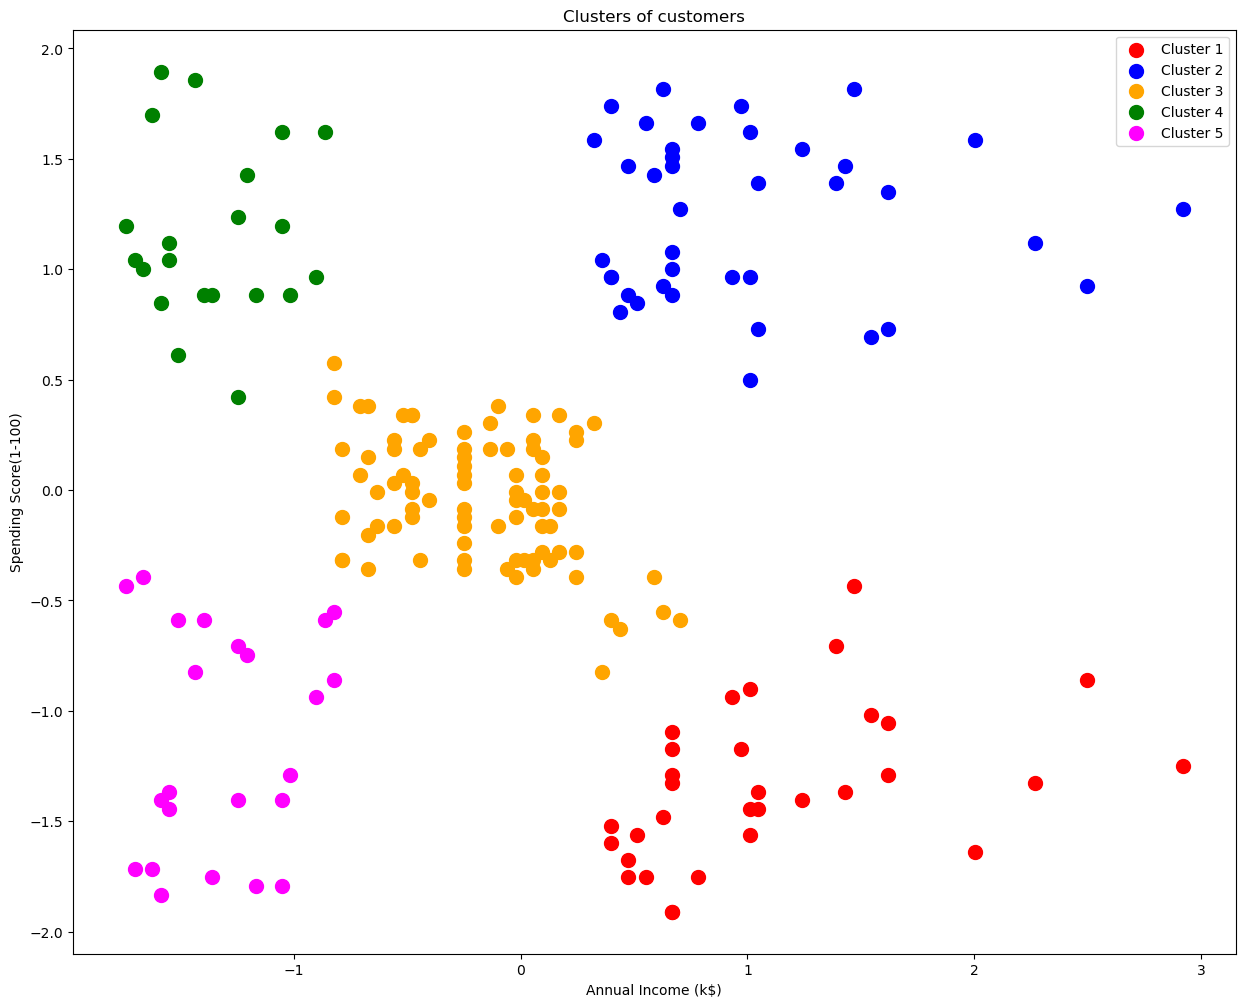

In [84]:
plt.figure(figsize=(15,12))
plt.scatter(X_2d[y_hc==0,0],X_2d[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X_2d[y_hc==1,0],X_2d[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X_2d[y_hc==2,0],X_2d[y_hc==2,1],s=100,c='orange',label='Cluster 3')
plt.scatter(X_2d[y_hc==3,0],X_2d[y_hc==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(X_2d[y_hc==4,0],X_2d[y_hc==4,1],s=100,c='magenta',label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

### As you can see, it has been clustered into 5 near equal clusters

# 4d Model

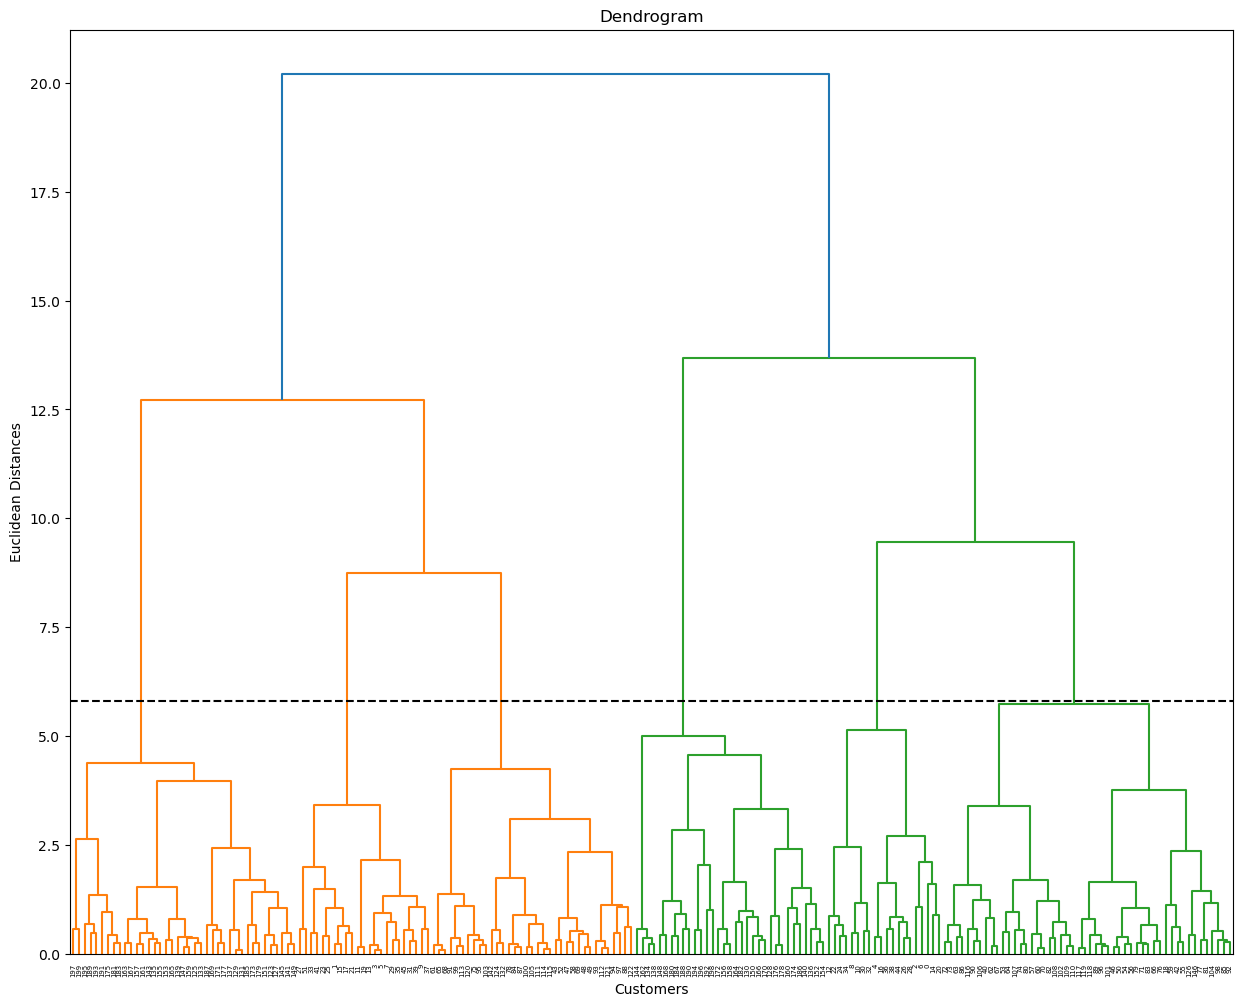

In [87]:
X=np.array(X)
plt.figure(figsize=(15,12))
X_4d=X[:,1:5]
dendrogram=sch.dendrogram(sch.linkage(X_4d,method='ward'))
plt.axhline(y=5.8,color='black',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

## We get 6 clusters including genre_female and age

In [90]:
hc_4d=AgglomerativeClustering(n_clusters=6,linkage='ward')
y_hc4d=hc_4d.fit_predict(X_4d)
print(y_hc4d)

[1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 0 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1
 5 1 5 0 5 0 4 1 5 0 4 4 4 0 5 4 0 0 0 0 0 4 0 0 4 0 0 0 4 0 0 4 4 0 0 0 0
 0 4 0 0 4 0 0 0 0 0 4 0 0 4 4 0 0 4 0 4 4 4 0 4 0 4 4 0 0 4 0 4 0 0 0 0 0
 4 4 4 4 4 0 0 0 0 4 4 4 3 4 3 0 3 2 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


### We cannot visualize this as it is 4 dimensional this is why i implemented a 2d as well as a 4d model

# RESULTS

##  Clustering Results 

I performed Agglomerative Hierarchical Clustering using two different sets of features to understand customer segmentation. The number of clusters for each model was determined by analyzing the dendrogram.

### 1. Two-Dimensional (2D) Analysis

* **Features Used:** `Annual Income (k$)` and `Spending Score (1-100)`
* **Optimal Clusters:** 5

By clustering only on income and spending, from the dendrogram I identified **5 distinct customer segments**, which represent the classic marketing profiles:
* Careful (Low Income, Low Spending)
* Standard (Average Income, Average Spending)
* Target (High Income, High Spending)
* Careless (Low Income, High Spending)
* Miser (High Income, Low Spending)

This 2D model provides a clear and visually intuitive segmentation based on the primary drivers of purchasing behavior.

### 2. Four-Dimensional (4D) Analysis

* **Features Used:** `Age`, `Annual Income (k$)`, `Spending Score (1-100)`, and `Genre`
* **Optimal Clusters:** 6

When incorporating `Age` and `Genre` into the model, the analysis revealed a more complex structure, suggesting **6 optimal clusters**.

This 4D model provides a more nuanced segmentation, as it accounts for the influence of age and gender on spending habits, not just income. While this model is too complex to visualize on a 2D scatter plot, it likely captures more subtle customer groups (e.g., "Young, Low-Income Spenders" vs. "Older, Low-Income Spenders").

## Final Result as it is easy to read we take the 2 Dimensional analysis and we target the induviduals who are in clusters 1.Target (High Income, High Spending) and Miser(High Income , Low Spending) for advertisements and marketing calls